In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Nicky\Project\Introduction_to_plotly\sunburst\MPVDataset.csv")
df["Victim's age"] = pd.to_numeric(df["Victim's age"], errors='coerce').fillna(0).astype(np.int64)
df.rename(columns={'Fleeing (Source: WaPo)': 'Fleeing'}, inplace=True)
df = df[df["State"].isin(['NY', 'CA', 'TX'])]
df = df[df["Victim's race"].isin(["White", "Black", "Hispanic", "Asian"])]

In [3]:
df.head(100)

Victim's name  Victim's age Victim's gender Victim's race  \
3              Abel Gurrola            26            Male      Hispanic   
7         Hunter Jacob Todd            20            Male         White   
9             Peter Jourdan            37            Male         Black   
21          Theodore Keiper            58            Male         White   
39          Binh Van Nguyen            39            Male         Asian   
..                      ...           ...             ...           ...   
407            Dalton Smith            30            Male         Black   
409           Tony Khan Nim            35            Male         Asian   
411  Guillermo Pablo Cedano            44            Male      Hispanic   
414            Charles Curl            46            Male         Black   
415          Terry Laffitte            50            Male         Black   

                                URL of image of victim  \
3    http://www.bakersfieldnow.com/news/local/A-26-...   
7    http://ak-cache.legacy.net/legacy/Images/Cobra...   
9    http://www.trbimg.com/img-50e7a90e/turbine/pet...   
21   https://scontent-sea.xx.fbcdn.net/hphotos-xap1...   
39   http://media.nbcbayarea.com/images/01-bihnnguy...   
..                                                 ...   
407  http://heavyeditorial.files.wordpress.com/2013...   
409                                                NaN   
411  http://ak-cache.legacy.net/legacy/Images/Cobra...   
414                                                NaN   
415  http://www.fatalencounters.org/wp-content/uplo...   

    Date of Incident (month/day/year)           Street Address of Incident  \
3                            1/1/2013                      720 Terrace Way   
7                            1/3/2013                8000 Debbie Ann Court   
9                            1/3/2013  Fort Hamilton Parkway & 62nd Street   
21                           1/5/2013            5504 Padre Juan Canyon Rd   
39                          1/11/2013              200 North Maxine Street   
..                                ...                                  ...   
407                         5/17/2013                213 California Avenue   
409                         5/17/2013                        211 S 1st St.   
411                         5/17/2013                       1000 Carob Way   
414                         5/18/2013                  1 W Manchester Blvd   
415                         5/18/2013             6100 Miramonte Boulevard   

               City State  Zipcode  ... Symptoms of mental illness?  \
3       Bakersfield    CA  93304.0  ...                          No   
7    Citrus Heights    CA  95610.0  ...                          No   
9          Brooklyn    NY  11219.0  ...                          No   
21          Ventura    CA  93001.0  ...                     Unknown   
39        Santa Ana    CA  92703.0  ...                          No   
..              ...   ...      ...  ...                         ...   
407       Uniondale    NY  11553.0  ...                          No   
409        Alhambra    CA  91801.0  ...                          No   
411      Montebello    CA  90640.0  ...                          No   
414       Inglewood    CA  90301.0  ...                          No   
415     Los Angeles    CA  90001.0  ...                          No   

             Unarmed Alleged Weapon (Source: WaPo)  \
3    Allegedly Armed                           gun   
7            Unarmed                       unarmed   
9    Allegedly Armed                           gun   
21           Unarmed                           toy   
39           Vehicle                       vehicle   
..               ...                           ...   
407  Allegedly Armed                           gun   
409  Allegedly Armed                         knife   
411  Allegedly Armed                         probe   
414  Allegedly Armed                       machete   
415  Allegedly Armed            

In [4]:
df.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed',
       'Alleged Weapon (Source: WaPo)', 'Alleged Threat Level (Source: WaPo)',
       'Fleeing', 'Body Camera (Source: WaPo)',
       'WaPo ID (If included in WaPo database)', 'Off-Duty Killing?',
       'Geography', 'ID'],
      dtype='object')

<h1>Plot charting</h1>

<h2>1. Basic Sunburst</h2>

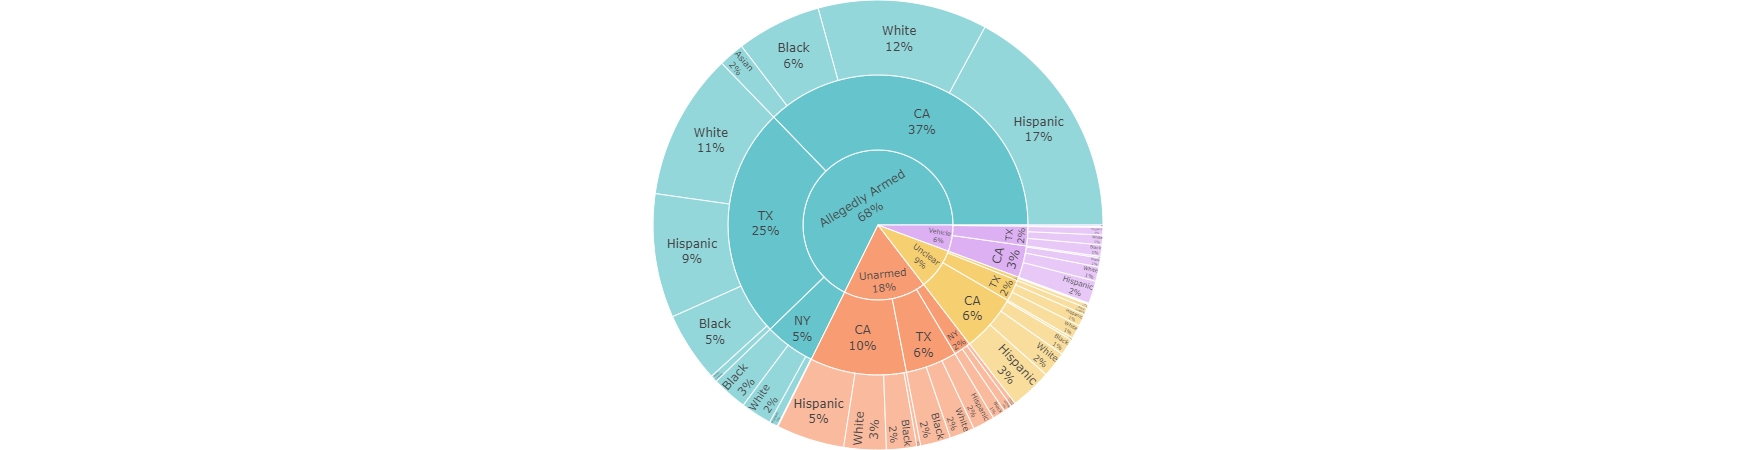

In [5]:
fig = px.sunburst(
    data_frame=df,
    path=["Unarmed", 'State', "Victim's race"],  # Root, branches, leaves
    color="Unarmed",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    # maxdepth=-1,                        # set the sectors rendered. -1 will render all levels in the hierarchy
    # color="Victim's age",
    # color_continuous_scale=px.colors.sequential.BuGn,
    # range_color=[10,100],

    # branchvalues="total",               # or 'remainder'
    # hover_name="Unarmed",
    # # hover_data={'Unarmed': False},    # remove column name from tooltip  (Plotly version >= 4.8.0)
    # title="7-year Breakdown of Deaths by Police",
    # template='ggplot2',               # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
    #                                   # 'plotly_white', 'plotly_dark', 'presentation',
    #                                   # 'xgridoff', 'ygridoff', 'gridon', 'none'
)

fig.update_traces(textinfo='label+percent entry')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

<h2>2. Basic Sunburst with extra level</h2>

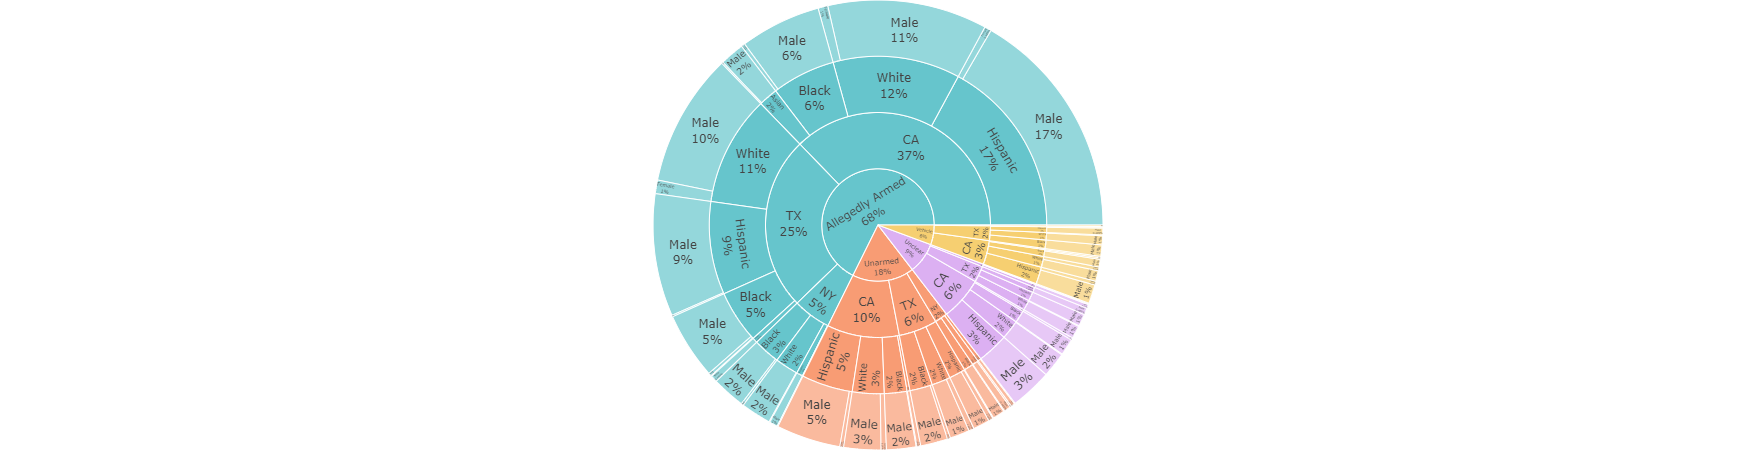

In [6]:
fig = px.sunburst(
    data_frame=df,
    path=["Unarmed", 'State', "Victim's race","Victim's gender"],  # Root, branches, leaves
    color="Unarmed",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    # maxdepth=-1,                        # set the sectors rendered. -1 will render all levels in the hierarchy
    # color="Victim's age",
    # color_continuous_scale=px.colors.sequential.BuGn,
    # range_color=[10,100],

    # branchvalues="total",               # or 'remainder'
    # hover_name="Unarmed",
    # # hover_data={'Unarmed': False},    # remove column name from tooltip  (Plotly version >= 4.8.0)
    # title="7-year Breakdown of Deaths by Police",
    # template='ggplot2',               # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
    #                                   # 'plotly_white', 'plotly_dark', 'presentation',
    #                                   # 'xgridoff', 'ygridoff', 'gridon', 'none'
)

fig.update_traces(textinfo='label+percent entry')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

<h2>3. Basic Sunburst with limit dept view</h2>

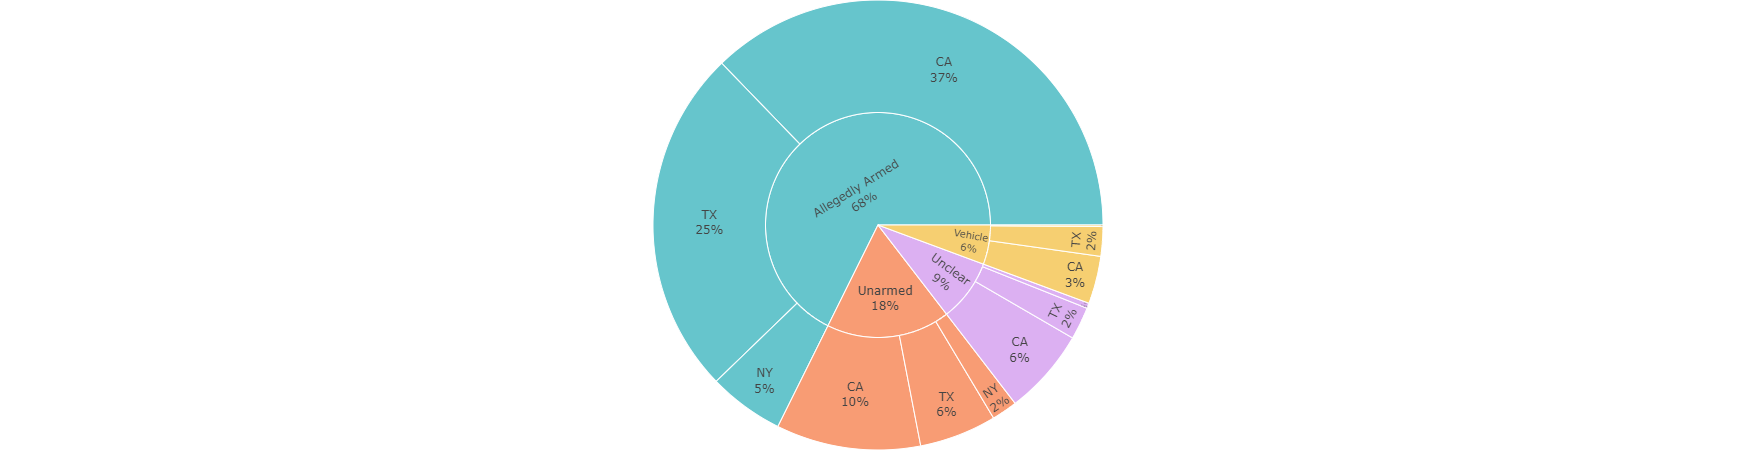

In [7]:
fig = px.sunburst(
    data_frame=df,
    path=["Unarmed", 'State', "Victim's race","Victim's gender"],  # Root, branches, leaves
    color="Unarmed",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth=2,                        # set the sectors rendered. -1 will render all levels in the hierarchy
    # color="Victim's age",
    # color_continuous_scale=px.colors.sequential.BuGn,
    # range_color=[10,100],

    # branchvalues="total",               # or 'remainder'
    # hover_name="Unarmed",
    # # hover_data={'Unarmed': False},    # remove column name from tooltip  (Plotly version >= 4.8.0)
    # title="7-year Breakdown of Deaths by Police",
    # template='ggplot2',               # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
    #                                   # 'plotly_white', 'plotly_dark', 'presentation',
    #                                   # 'xgridoff', 'ygridoff', 'gridon', 'none'
)

fig.update_traces(textinfo='label+percent entry')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

<h2>4. Basic Sunburst with colour view</h2>

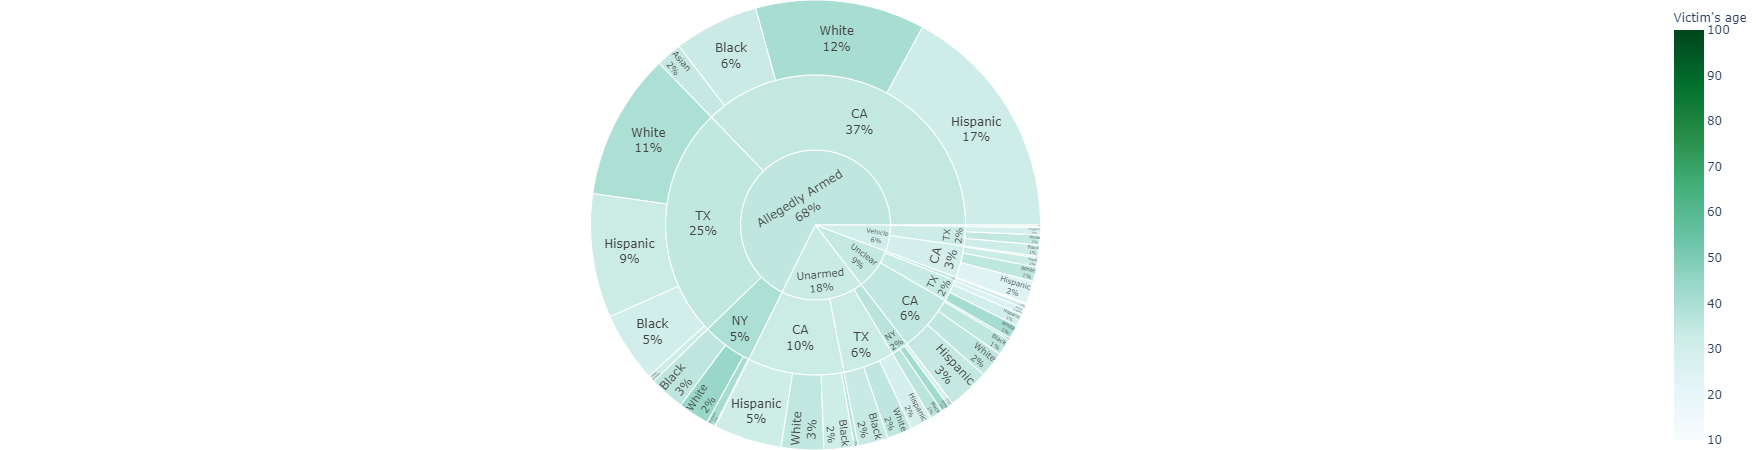

In [8]:
fig = px.sunburst(
    data_frame=df,
    path=["Unarmed", 'State', "Victim's race"],  # Root, branches, leaves
#     color="Unarmed",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth=-1,                        # set the sectors rendered. -1 will render all levels in the hierarchy
    color="Victim's age",
    color_continuous_scale=px.colors.sequential.BuGn,
    range_color=[10,100],

    # branchvalues="total",               # or 'remainder'
    # hover_name="Unarmed",
    # # hover_data={'Unarmed': False},    # remove column name from tooltip  (Plotly version >= 4.8.0)
    # title="7-year Breakdown of Deaths by Police",
    # template='ggplot2',               # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
    #                                   # 'plotly_white', 'plotly_dark', 'presentation',
    #                                   # 'xgridoff', 'ygridoff', 'gridon', 'none'
)

fig.update_traces(textinfo='label+percent entry')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

<h2>5. Basic Sunburst with remainder</h2>

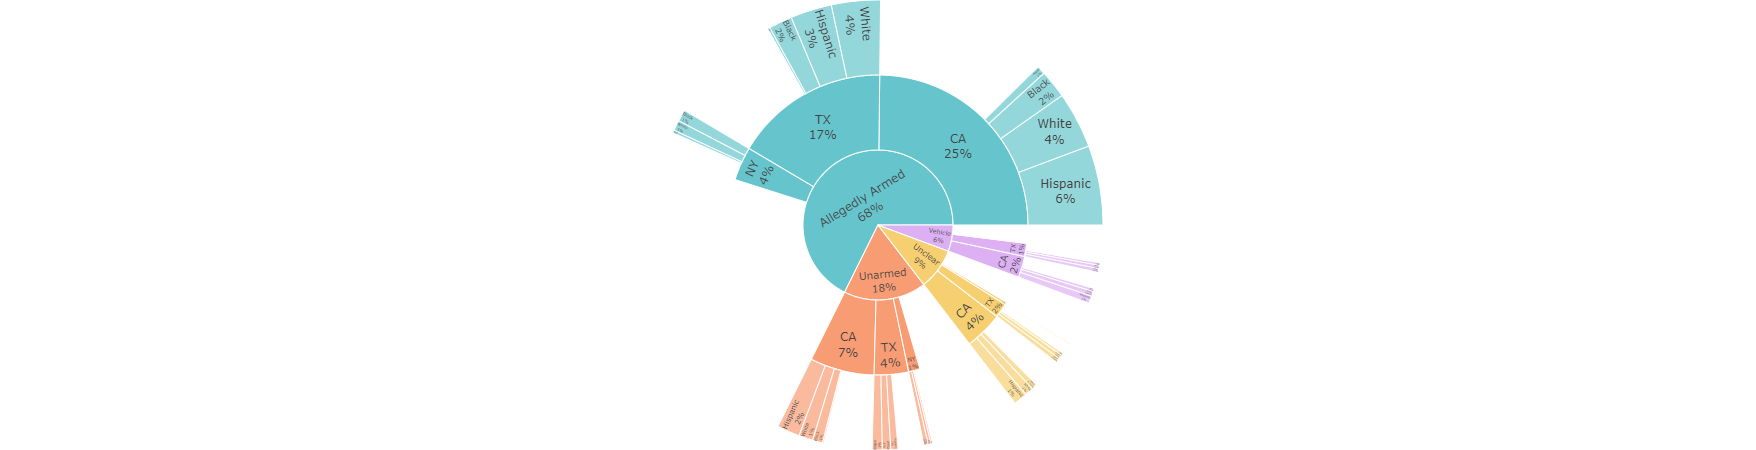

In [9]:
fig = px.sunburst(
    data_frame=df,
    path=["Unarmed", 'State', "Victim's race"],  # Root, branches, leaves
    color="Unarmed",
    color_discrete_sequence=px.colors.qualitative.Pastel,
#     maxdepth=-1,                        # set the sectors rendered. -1 will render all levels in the hierarchy
#     color="Victim's age",
#     color_continuous_scale=px.colors.sequential.BuGn,
#     range_color=[10,100],

    branchvalues="remainder",               # 'remainder' or 'total'
    # hover_name="Unarmed",
    # # hover_data={'Unarmed': False},    # remove column name from tooltip  (Plotly version >= 4.8.0)
    # title="7-year Breakdown of Deaths by Police",
    # template='ggplot2',               # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
    #                                   # 'plotly_white', 'plotly_dark', 'presentation',
    #                                   # 'xgridoff', 'ygridoff', 'gridon', 'none'
)

fig.update_traces(textinfo='label+percent entry')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

<h2>6. Basic Sunburst with label and template</h2>

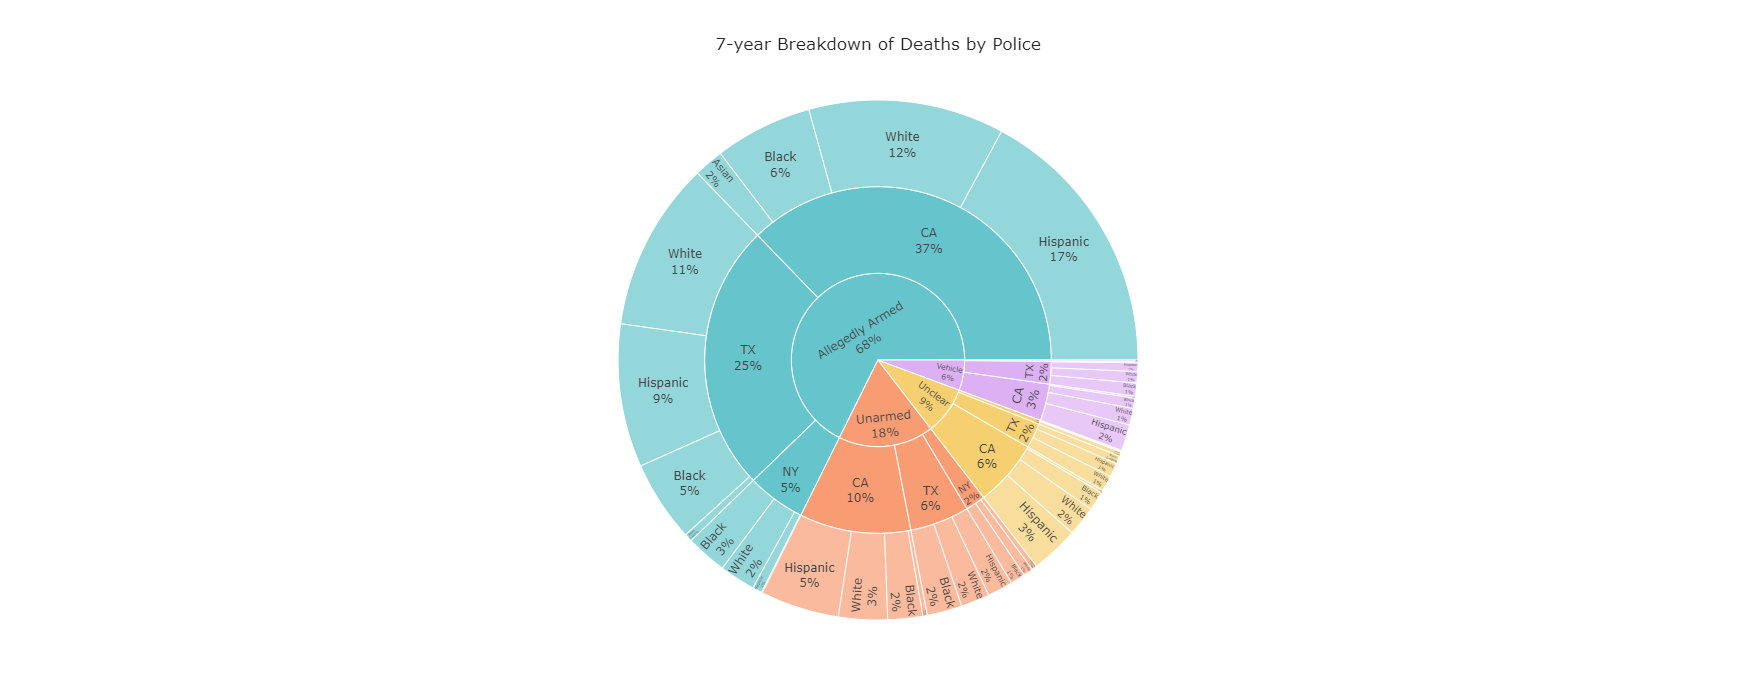

In [10]:
fig = px.sunburst(
    data_frame=df,
    path=["Unarmed", 'State', "Victim's race"],  # Root, branches, leaves
    color="Unarmed",
    color_discrete_sequence=px.colors.qualitative.Pastel,
#     maxdepth=-1,                        # set the sectors rendered. -1 will render all levels in the hierarchy
#     color="Victim's age",
#     color_continuous_scale=px.colors.sequential.BuGn,
#     range_color=[10,100],

#     branchvalues="remainder",               # 'remainder' or 'total'
    hover_name="Unarmed",
    hover_data={'Unarmed': False},    # remove column name from tooltip  (Plotly version >= 4.8.0)
    title="7-year Breakdown of Deaths by Police",
    template='seaborn',               # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
                                      # 'plotly_white', 'plotly_dark', 'presentation',
                                      # 'xgridoff', 'ygridoff', 'gridon', 'none'
    height=700,
)

fig.update_traces(textinfo='label+percent entry')
# fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

<h2>7. Basic Sunburst with update traces</h2>

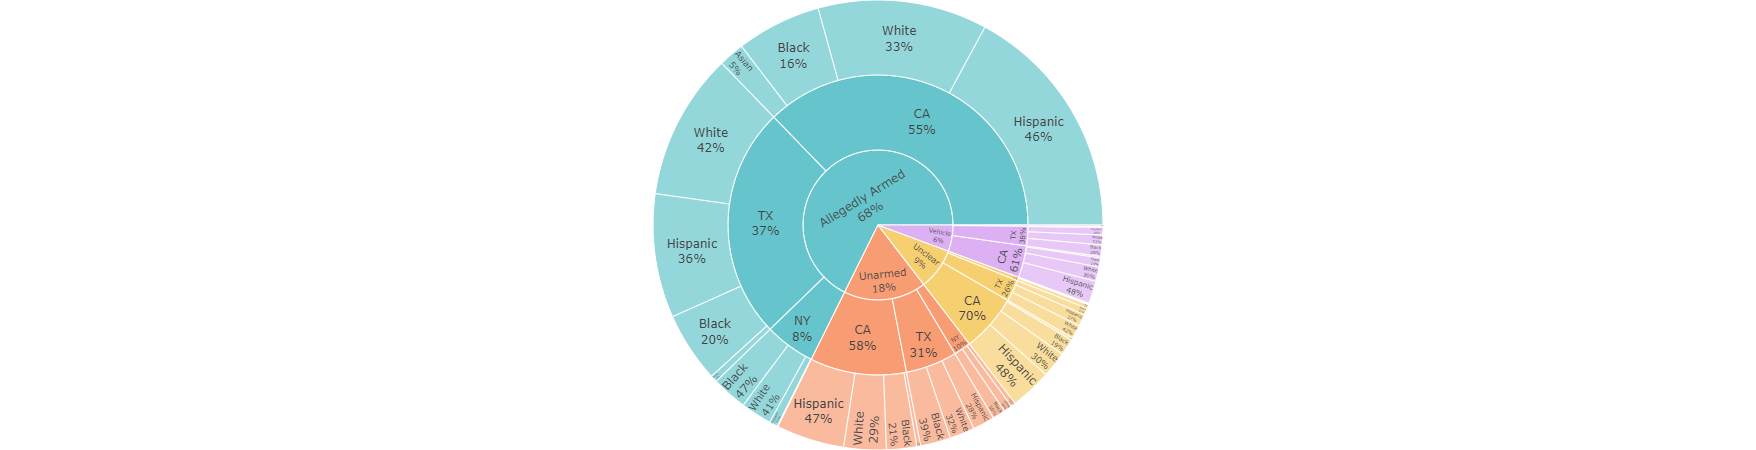

In [11]:
fig = px.sunburst(
    data_frame=df,
    path=["Unarmed", 'State', "Victim's race"],  # Root, branches, leaves
    color="Unarmed",
    color_discrete_sequence=px.colors.qualitative.Pastel,
#     maxdepth=-1,                        # set the sectors rendered. -1 will render all levels in the hierarchy
#     color="Victim's age",
#     color_continuous_scale=px.colors.sequential.BuGn,
#     range_color=[10,100],

#     branchvalues="remainder",               # 'remainder' or 'total'
#     hover_name="Unarmed",
#     hover_data={'Unarmed': False},    # remove column name from tooltip  (Plotly version >= 4.8.0)
#     title="7-year Breakdown of Deaths by Police",
#     template='seaborn',               # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
#                                       # 'plotly_white', 'plotly_dark', 'presentation',
#                                       # 'xgridoff', 'ygridoff', 'gridon', 'none'
)

fig.update_traces(textinfo='label+percent parent') # or percent entry
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()